In [1]:
# load all the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np 

In [2]:
# load the dataset
iris_dataset = pd.read_csv('data/IRIS.csv')

# print the ds to the screen 
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#iris_dataset.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}, inplace=True)

In [4]:
# let s split the ds in X and y 
#now I create the X and the y 
x = iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_dataset['species'].values

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [7]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)
#this can be done using this method also #iris_dataset.species.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica': 2}, inplace=True)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82fa82f310>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

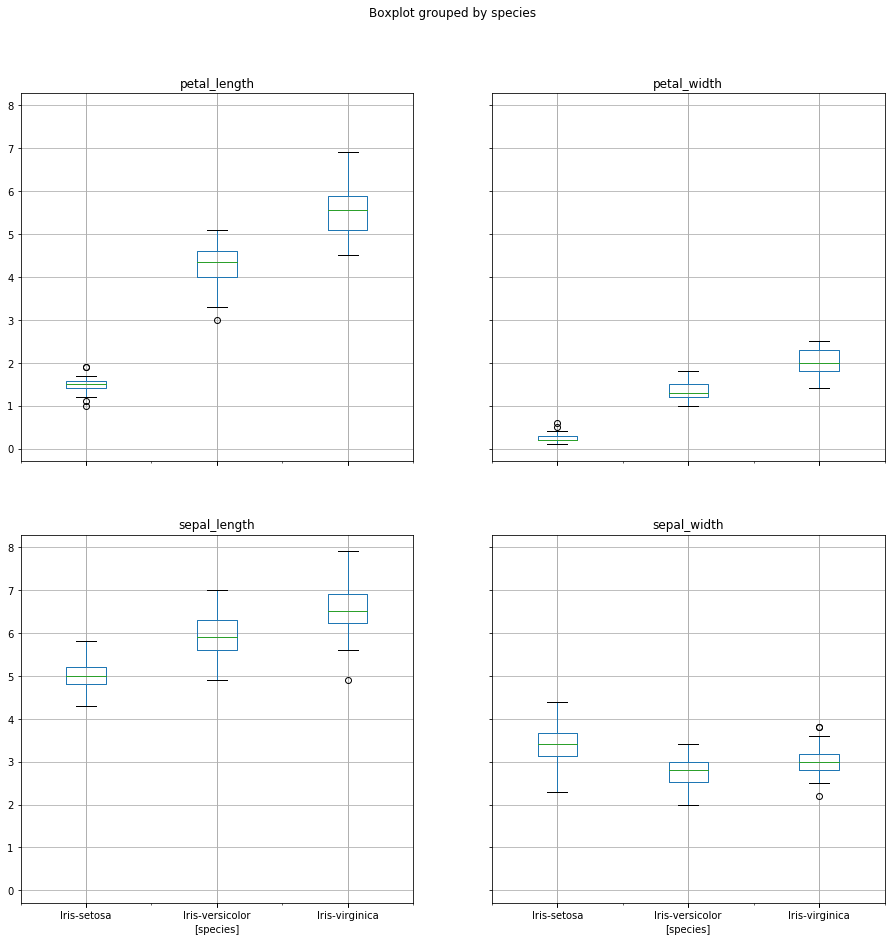

In [9]:
plt.figure()
iris_dataset.boxplot(by="species",figsize=(15,15))

In [10]:
# instance of kfold 
kfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold.get_n_splits(x, y)
folds = list(kfold.split(x,y))

In [11]:
folds

[(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
          36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
         106, 107, 108, 109])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31, 

In [12]:
final_pred = list()
final_true = list() 

for foldcounter, (train_idx, validation_idx) in enumerate(folds):
    print(f"[FOLD {foldcounter}]")
    x_train = x[train_idx]
    y_train = y[train_idx]
    x_test = x[validation_idx]
    y_test = y[validation_idx]

    # generate the classifier
    regression = KNeighborsClassifier(n_neighbors=3)
    regression.fit(x_train, y_train)
    prediction = regression.predict(x_test)
    
    print(f"True label -> {y_test}-predicted -> {prediction}")
    
    final_pred.append(prediction)
    final_true.append(y_test)

# make array out of prediction
final_pred = np.array(final_pred).reshape((-1,))
final_true = np.array(final_true).reshape((-1,))

[FOLD 0]
True label -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]-predicted -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]
[FOLD 1]
True label -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]-predicted -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1]
[FOLD 2]
True label -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]-predicted -> [0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[FOLD 3]
True label -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]-predicted -> [0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[FOLD 4]
True label -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]-predicted -> [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


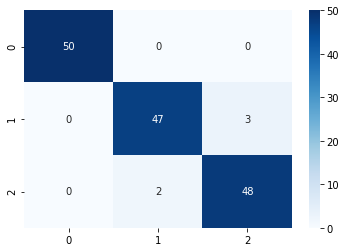

In [13]:
cm=confusion_matrix(final_true,final_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

In [14]:
acc=accuracy_score(final_true,final_pred)*100
print(f"The accuracy score is {acc}%")

The accuracy score is 96.66666666666667%


In [15]:
print("Hello World!!!")

Hello World!!!
